# **Heart Disease Dataset**

# **Introduction**

 **Author: [Eman Zahid](https://www.linkedin.com/in/eman-zahid-b384a6300?)** \
 **Dataset: [Heart Disease Diagnosis](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)**

## **Meta Data** 

This dataset is multivariate, featuring a wide range of statistical and mathematical variables ideal for numerical data analysis. It comprises 14 key attributes including age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate, exercise-induced angina, ST depression (oldpeak), the slope of the ST segment, number of major vessels, and Thalassemia. Although the full database contains 76 attributes, most studies focus on a subset of these 14 features. The Cleveland database is a primary source for machine learning research in predicting heart disease. The main objective is to determine whether a patient has heart disease based on these features, with further analysis offering insights into diagnosing cardiovascular conditions.

**Column Descriptions:**

* id: Unique identifier for each patient
* age: Age of the patient (in years)
* origin: Location of the study
* sex: Gender of the patient (Male/Female)
* cp: Type of chest pain (typical angina, atypical angina, non-anginal, asymptomatic)
* trestbps: Resting blood pressure (in mm Hg at hospital admission)
* chol: Serum cholesterol level (in mg/dl)
* fbs: Fasting blood sugar (>120 mg/dl, True/False)
* restecg: Resting electrocardiographic results (normal, ST-T abnormality, left ventricular hypertrophy)
* thalach: Maximum heart rate achieved
* exang: Exercise-induced angina (Yes/No)
* oldpeak: ST depression induced by exercise relative to rest
* slope: Slope of the peak exercise ST segment
* ca: Number of major vessels (0-3) identified via fluoroscopy
* thal: Thalassemia type (normal, fixed defect, reversible defect)
* num: Diagnosis outcome (0 indicates no presence of heart disease)


### **Acknowledgements:**

The dataset was created with contributions from multiple medical institutions:

* Hungarian Institute of Cardiology, Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### **Relevant Research Papers:**

* Detrano, R. et al. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64, 304-310.
* Aha, D. W., & Kibler, D. Instance-based prediction of heart-disease presence with the Cleveland database.
* Gennari, J.H., Langley, P., & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11-61.

# **Aims and Objectives**

# **Initial Steps**
## **Import the Libraries** 
Let's start this project by importing the libraries, we'll need in this project.

In [581]:
#import libraries

#1. to handle the data
import pandas as pd
import numpy as np
#2. to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#3. to pre-process the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
#import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
#4. to train the model in ML
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 
#5. for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
#5a. metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



#ignore warnings
import warnings
warnings.filterwarnings('ignore')


## **Load the Dataset**


In [582]:
#way-1: load the data from csv placed locally in our pc
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
#displaying top 5 rows of data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [583]:
#way-2: load the data when you don't have dataset in your pc
with open('/kaggle/input/heart-disease-data/heart_disease_uci.csv') as f:
    df = pd.read_csv(f)
##displaying top 5 rows of data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **Exploratory Data Analysis**

## **Preview the Data**

In [584]:
#explore each column's datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


We have missing values in the following variables:
* trestbps
* chol
* fbs
* restecg
* thalch
* exang
* oldpeakslope
* ca
* thal

But we'll deal with these missing values in the next steps.

In [585]:
#check the shape of dataset
df.shape

(920, 16)

## **Explore Each Column**
### id

In [586]:
#find min and max value of id variable
df['id'].min(), df['id'].max()

(1, 920)

In [587]:
#is there any id number duplicate? 
df['id'].nunique()
#Answer: No, there are unique id number in each row.

920

### age

In [588]:
#smmary statistics of 'age' variable
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [589]:
#minimum and maximum age for heart disease 
print("The minimum age for heart disease diagnosis is: ",df['age'].min())
print("The maximum age for heart disease diagnosis is: ",df['age'].max())

The minimum age for heart disease diagnosis is:  28
The maximum age for heart disease diagnosis is:  77


Text(0.5, 0, 'Age')

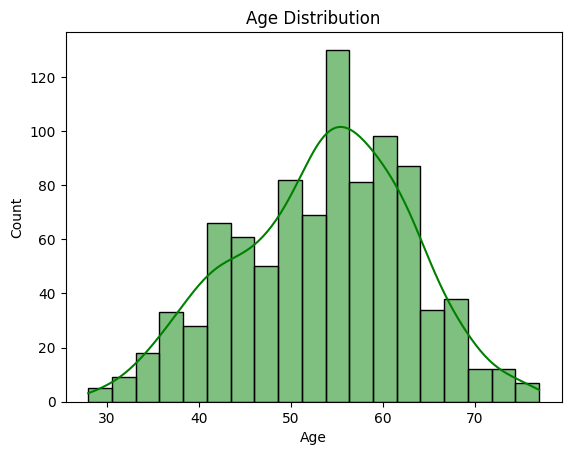

In [590]:
#plot distribution of age column
sns.histplot(data=df, x='age', kde=True,color='green')
plt.title('Age Distribution')
plt.xlabel('Age')

The mean of age is:  53.51086956521739
The median of age is:  54.0
The mean of age is:  54


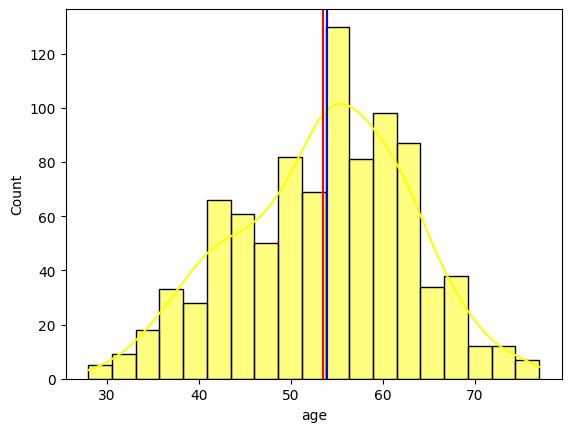

In [591]:
#plot the mean,median and mode of age column to check at which age, most people suffer from heart disease
sns.histplot(df['age'],kde=True,color='yellow')
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='blue')

#print mean, median and mode
print("The mean of age is: ", df['age'].mean())
print("The median of age is: ", df['age'].median())
print("The mean of age is: ",df['age'].mode()[0])

#Answer is: 53-54 years old people are mostly suffer from heart disease.

In [592]:
#lets check the age based on gender | who suffer from heart disease mostly? (male or female)
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

#Answer: Mostly males are suffer from heart disease than females at the age of 54-55 years. But how? Lets see in the next step.

### sex

In [593]:
#lets check the value count of sex variable in this data
df['sex'].value_counts()

#males are in greater amount than females

sex
Male      726
Female    194
Name: count, dtype: int64

In [594]:
#calculate the percentage of male & female value counts in data
male_count = 726
female_count = 194
total_count = male_count + female_count
#total count=920
#male percentage
male_percentage = (male_count/total_count) * 100
print("The percentage of male's value count in data is:", round(male_percentage,2),'%')
#female percentage
female_percentage = (female_count/total_count) * 100
print("The percentage of female's value count in data is:", round(female_percentage,2),'%')


The percentage of male's value count in data is: 78.91 %
The percentage of female's value count in data is: 21.09 %


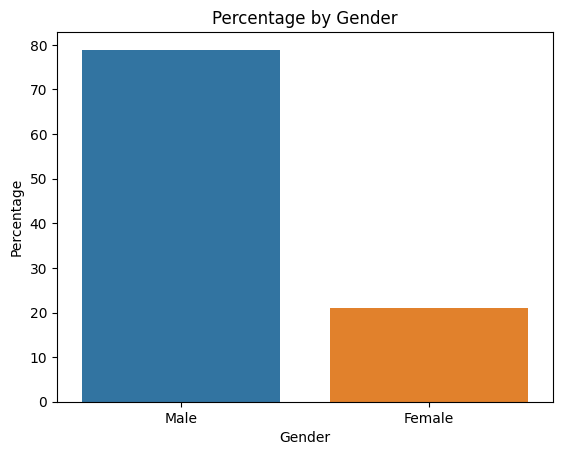

In [595]:
#plot percentages through barplot
sns.barplot(x=['Male', 'Female'], y=[male_percentage, female_percentage])
plt.title('Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


### dataset

In [596]:
#lets deal with 'dataset' variable
#find places where this data is collected
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

We have highest number of records collected from **Cleveland** and the lowest number of records collected from **Switzerland**

<Axes: xlabel='dataset', ylabel='count'>

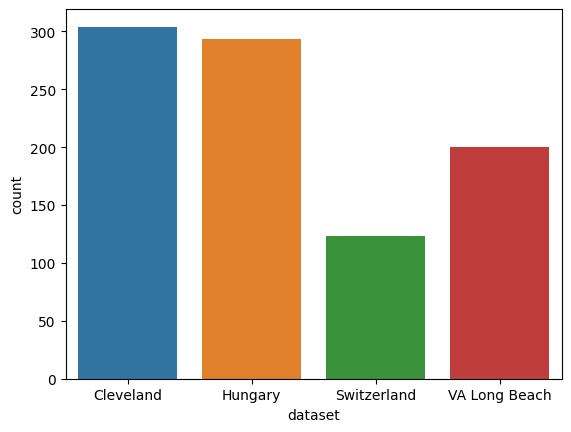

In [597]:
#plot the countplot of dataset variable
sns.countplot(data=df,x='dataset')

In [598]:
#lets find the sex ratio through groupby method in places where data is collected
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

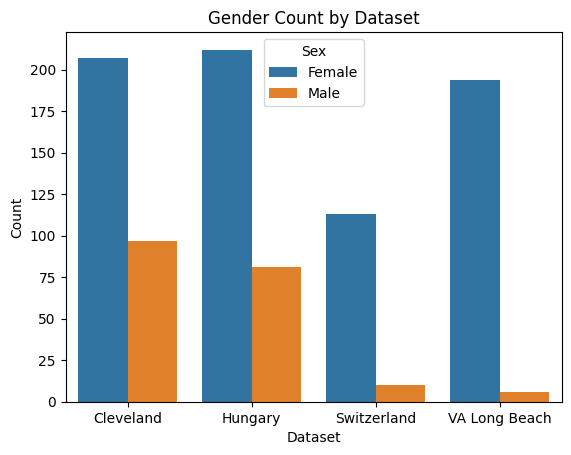

In [599]:
#plot this ratio
sns.countplot(data=df, x='dataset', hue='sex')
plt.title('Gender Count by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

* The highest number of females in this dataset are from **Cleveland (97)** and the lowest no. of females are from **VA Long Beach (6)**
* The highest number of males in this dataset are from **Hungary (212)** and the lowest no. of males are from **Switzerland (113)**

### cp(chest pain)

In [600]:
#let's find how many types are in cp variable
df['cp'].nunique()
#answer---> 4

4

In [601]:
#let's find what are those 4 types
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

* Typical Angina: Chest pain caused by reduced blood flow to the heart, usually triggered by physical exertion or stress.
* Asymptomatic: No noticeable chest pain or symptoms, even if there's underlying heart disease.
* Non-Anginal: Chest pain not related to heart problems, often caused by conditions like acid reflux or muscle strain.
* Atypical Angina: Chest pain with unusual symptoms, such as discomfort not directly linked to exertion or classic angina triggers.

In [602]:
#lets find value count of these types in data
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [603]:
#In which age span, cp is on peak?
df.groupby('cp')['age'].value_counts().sort_values(ascending=False)

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
non-anginal     35      1
                70      1
                73      1
typical angina  30      1
                74      1
Name: count, Length: 156, dtype: int64

In [604]:
#plot
fig = px.histogram(data_frame=df, x='age',color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

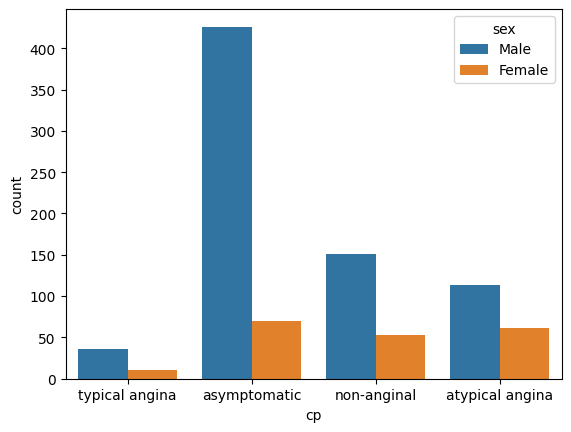

In [605]:
#countplot of cp column group by sex variable
sns.countplot(df, x='cp', hue='sex')

* asymptomatic in males are larger compared to females. now the question is, in which dataset (place), asymptomatic data was maximum found.

<Axes: xlabel='cp', ylabel='count'>

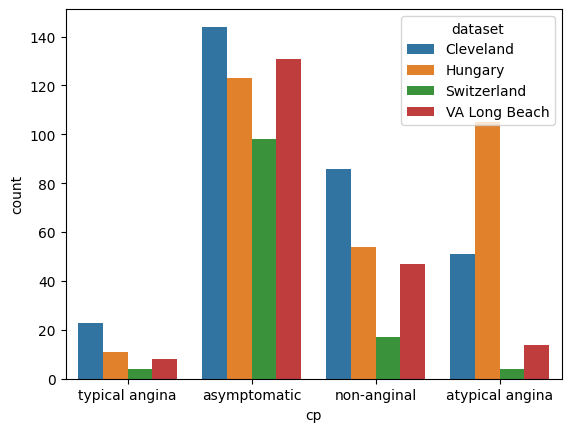

In [606]:
#countplot of cp column group by dataset variable
sns.countplot(df, x='cp', hue='dataset')

* This graph shows that mostly data of asymptomatic collected from "Cleveland"

### trestbps

(The normal resting blood pressure is 90/60 mm Hg & 120/80 mm Hg)



In [607]:
#preview the trestbps
df['trestbps'].head()

0    145.0
1    160.0
2    120.0
3    130.0
4    130.0
Name: trestbps, dtype: float64

In [608]:
#summary statistics of trestbps
df['trestbps'].describe()


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

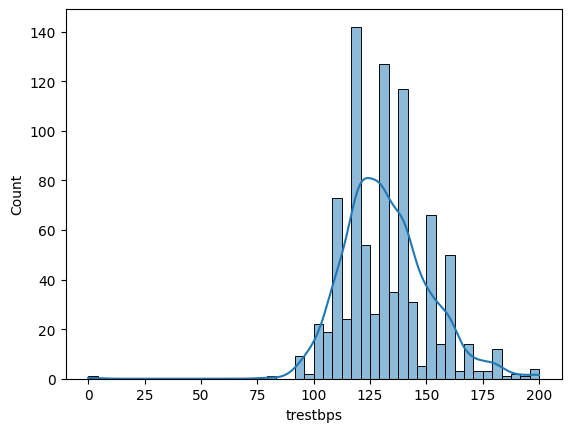

In [609]:
#create a histplot of trestbps column
sns.histplot(data=df, x='trestbps',kde=True)

In [610]:
#missing values check
df['trestbps'].isnull().sum()

59

* We have to impute these missing values in the next steps.

In [611]:
#check trestbps value based on sex variable
(df.groupby('sex')['trestbps']).value_counts()

sex     trestbps
Female  120.0       32
        130.0       30
        140.0       18
        150.0       13
        110.0       11
                    ..
Male    123.0        1
        129.0        1
        164.0        1
        185.0        1
        192.0        1
Name: count, Length: 98, dtype: int64

### chol (cholestrol)

In [612]:
#cholestrol level = 0? is it outlier?
df['chol'].value_counts()
#Answer: 171 records consist of 0 cholestrol and dataset is collected from 4 different authentic places. So, these are not outliers.

chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

### fbs (fasting blood sugar)

In [613]:
df['fbs']

0       True
1      False
2      False
3      False
4      False
       ...  
915     True
916    False
917     True
918     True
919    False
Name: fbs, Length: 920, dtype: object

In [614]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [615]:
df['restecg'].isnull().sum()

2

In [616]:
#restecg based on gender
df.groupby('sex')['restecg'].value_counts()

sex     restecg         
Female  normal              119
        lv hypertrophy       47
        st-t abnormality     28
Male    normal              432
        st-t abnormality    151
        lv hypertrophy      141
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

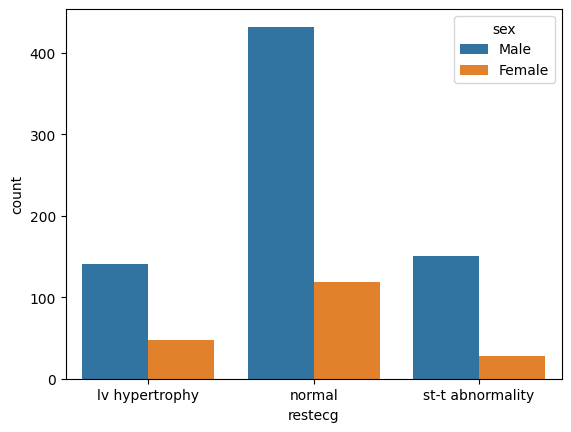

In [617]:
sns.countplot(data=df, x='restecg', hue='sex')

### thalch

In [618]:
print(df['thalch'].min()) #minimum 
print(df['thalch'].max()) #maximum

60.0
202.0


### exang

In [619]:
df['exang']

0      False
1       True
2       True
3      False
4      False
       ...  
915    False
916      NaN
917    False
918      NaN
919     True
Name: exang, Length: 920, dtype: object

### oldpeak

In [620]:
print(df['oldpeak'].min())
print(df['oldpeak'].max())

-2.6
6.2


### slope

In [621]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

* Flat:
Indicates no significant change in the ST segment during exercise, often associated with a higher risk of heart disease.

* Upsloping:
The ST segment rises during exercise, which is generally considered a normal response or less indicative of severe heart issues.

* Downsloping:
The ST segment drops during exercise, strongly associated with ischemia (insufficient blood flow to the heart) and heart disease risk.

The counts indicate how many patients in the dataset have each slope type, with flat slopes being the most common.

### ca

In a heart disease dataset, ca typically refers to the number of major coronary arteries (0-3) that are colored by fluoroscopy. This variable is used to assess the extent of coronary artery disease (CAD).

* Meaning of Values:
  
0: No major vessels are blocked or show significant narrowing.
1-3: Number of major coronary arteries (out of 3) that are narrowed or blocked.
1: One artery affected.
2: Two arteries affected.
3: Three arteries affected.

* Significance:
Higher values of ca indicate more severe coronary artery disease and a higher risk of heart-related complications.







In [622]:
df['ca'].min()

0.0

In [623]:
df['ca'].max()

3.0

In [624]:
df['ca'].value_counts().head(4)

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

### thal

In [625]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [626]:
#thal based on gender
df.groupby('sex')['thal'].value_counts()

sex     thal             
Female  normal                86
        reversable defect     21
        fixed defect           4
Male    reversable defect    171
        normal               110
        fixed defect          42
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

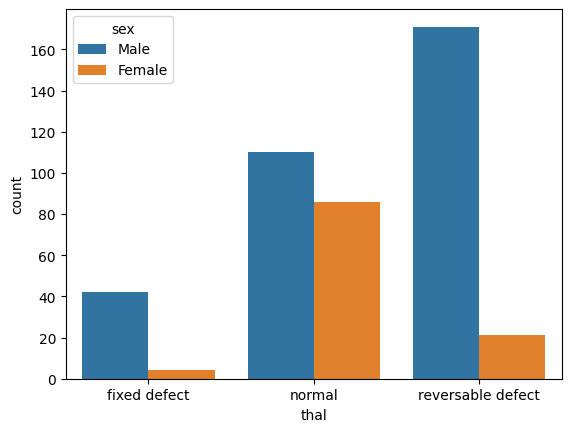

In [627]:
#plot
sns.countplot(data=df, x='thal', hue= 'sex')

### num (target variable)

'num' typically refers to the diagnosis of heart disease, often represented as a categorical variable indicating the presence or absence of the condition.

* Possible Values:
0: No heart disease (healthy).
1, 2, 3, 4: Different levels of heart disease severity, where higher values indicate more severe forms of the condition.

In [628]:
df['num'].describe()

count    920.000000
mean       0.995652
std        1.142693
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

In [629]:
# Count of unique values in `num`
print(df['num'].value_counts())


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


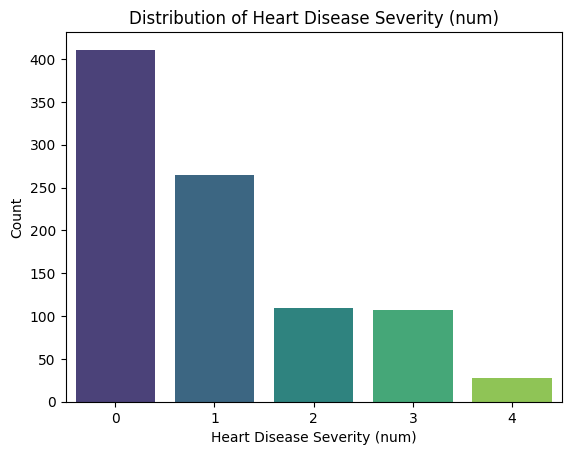

In [630]:
# Plot the distribution of `num` values
sns.countplot(data=df, x='num', palette='viridis')
plt.title('Distribution of Heart Disease Severity (num)')
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('Count')
plt.show()


In [631]:
# Percentage distribution of `num`
percentage_distribution = df['num'].value_counts(normalize=True) * 100
print(percentage_distribution)


num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


In [632]:
# Average age for each heart disease severity level
avg_age_per_num = df.groupby('num')['age'].mean()
print(avg_age_per_num)


num
0    50.547445
1    53.528302
2    57.577982
3    59.214953
4    59.214286
Name: age, dtype: float64


## **Missing Values**

In [633]:
#deal with missing values in trestbps column
print(f'The missing values in trestbps variable are: ',df['trestbps'].isnull().sum())

The missing values in trestbps variable are:  59


In [634]:
#percentage of missing values
print(f"The percentage of missing values in trestbps variable are: {df['trestbps'].isnull().sum()/len(df)*100:.2f}%")

The percentage of missing values in trestbps variable are: 6.41%


In [635]:
#impute missing values using iterative imputer
imputer = IterativeImputer(max_iter=10,random_state=42)
#fit the imputer on trestbps
imputer.fit(df[['trestbps']])
#transform 
df['trestbps'] = imputer.transform(df[['trestbps']])


In [636]:
#verify if the missing values are imputed or not
df['trestbps'].isnull().sum()

0

In [637]:
#find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [638]:
#find only numeric columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [639]:
#find only boolean columns
bool_cols = df.select_dtypes(include='bool').columns.tolist()
bool_cols

[]

In [640]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

* There are 9 columns which have missing values but first we impute those column that has numerical datatype. 

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [642]:
# [ca,oldpeak, thalch, chol]---> These are columns that has numeric dtype
#impute missing values by iterative imputer
imputer_1 = IterativeImputer(max_iter=10,random_state=42)
#fit_transform the imputer
df[['ca','oldpeak','thalch','chol']] = imputer_1.fit_transform(df[['ca','oldpeak','thalch','chol']])

In [643]:
#check if the missing values are imputed or not
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

* We have only 5 variables with missing values have object dtype.

### thal
(Thalassemia)

In [644]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

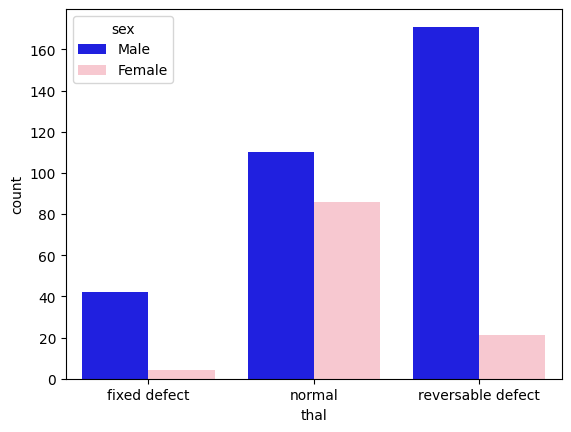

In [645]:
#plot 'thal' by sex variable
sns.countplot(data=df, x='thal', hue='sex', palette={'Male': 'blue', 'Female': 'pink'})


In [646]:
#missing value %age in 'thal' varibale
print(f"The percentage of missing values in this variable is: {df['thal'].isnull().sum()/len(df) *100:.2f}%")

The percentage of missing values in this variable is: 52.83%


In [647]:
#lets impute missing values in thal column by ML models
#define the function
def impute_missing_values_with_rf(df, column_name):
    """
    Impute missing values in a categorical column using RandomForestClassifier.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with missing values.
        column_name (str): The name of the categorical column to impute.
    
    Returns:
        pd.DataFrame: The DataFrame with missing values imputed.
    """
    
    # Step 1: Create a copy of the original DataFrame to avoid modifying it directly
    df = df.copy()
    
    # Step 2: Check if the column has missing values
    if df[column_name].isnull().sum() == 0:
        print(f"No missing values in column '{column_name}' to impute.")
        return df
    
    print(f"Imputing missing values in column '{column_name}' with RandomForestClassifier...")
    
    # Step 3: Label encode the target column
    le = LabelEncoder()
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].apply(lambda x: np.nan if x.lower() == 'nan' else x)
    
    # Encode non-null values
    non_null_data = df[df[column_name].notnull()]
    null_data = df[df[column_name].isnull()]
    
    if null_data.empty:
        print(f"No missing values in '{column_name}' after preprocessing.")
        return df
    
    # Encode the target variable
    non_null_data[column_name] = le.fit_transform(non_null_data[column_name].astype(str))

    # Step 4: Define features (X) and target (y)
    X = non_null_data.drop(columns=[column_name])
    y = non_null_data[column_name]

    # One-hot encode the features
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Align features for the null_data set
    null_data_encoded = pd.get_dummies(null_data.drop(columns=[column_name]), drop_first=True)
    null_data_encoded = null_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Check for any data availability
    if null_data_encoded.empty:
        print("No matching features found between training data and null data for prediction.")
        return df

    # Step 5: Train RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
    rf_model.fit(X_encoded, y)
    
    # Step 6: Predict missing values
    predicted_values = rf_model.predict(null_data_encoded)

    # Step 7: Decode the predicted values back to the original labels
    decoded_values = le.inverse_transform(predicted_values)

    # Step 8: Impute missing values in the original DataFrame
    df.loc[df[column_name].isnull(), column_name] = decoded_values

    print(f"Missing values in '{column_name}' have been imputed successfully.")
    return df

In [648]:
#impute missing values 
df = impute_missing_values_with_rf(df, 'thal')


Imputing missing values in column 'thal' with RandomForestClassifier...
Missing values in 'thal' have been imputed successfully.


### slope

In [649]:
#impute missing values by reusing the function
df = impute_missing_values_with_rf(df, 'slope')

Imputing missing values in column 'slope' with RandomForestClassifier...
Missing values in 'slope' have been imputed successfully.


### exang

In [650]:
#impute missing values by reusing the function
df = impute_missing_values_with_rf(df, 'exang')

Imputing missing values in column 'exang' with RandomForestClassifier...
Missing values in 'exang' have been imputed successfully.


### restecg

In [651]:
#impute missing values by reusing the function
df = impute_missing_values_with_rf(df, 'restecg')

Imputing missing values in column 'restecg' with RandomForestClassifier...
Missing values in 'restecg' have been imputed successfully.


### fbs

In [652]:
#impute missing values by reusing the function
df = impute_missing_values_with_rf(df, 'fbs')

Imputing missing values in column 'fbs' with RandomForestClassifier...
Missing values in 'fbs' have been imputed successfully.


In [653]:
#verify if the dataset has missing values imputed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Now all variables have 920 values. It means there is no missing value in any column or variable.

## **Outliers**

### age

<Axes: >

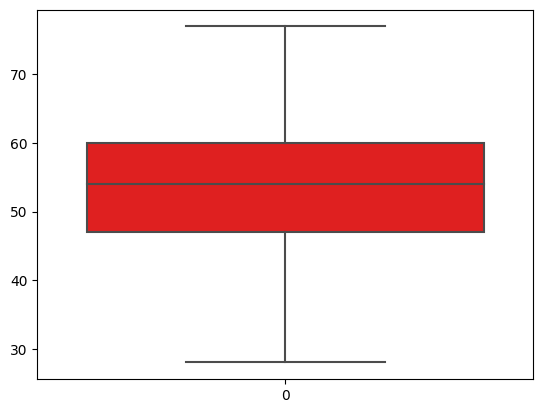

In [654]:
#boxplot of numeric columns
sns.boxplot(df['age'],color='red')

### thalch

<Axes: >

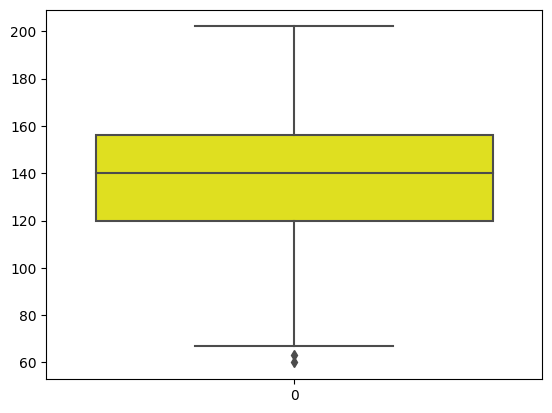

In [655]:
sns.boxplot(df['thalch'],color='yellow')

### trestbps

<Axes: >

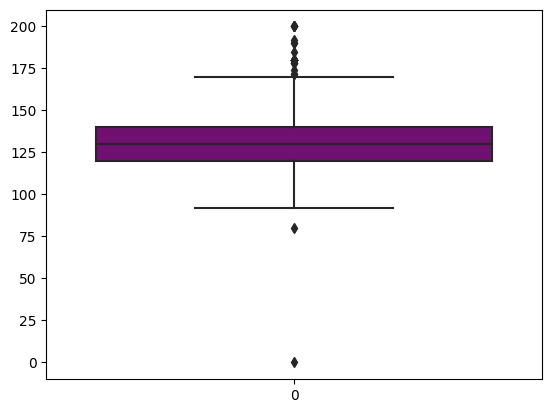

In [656]:
sns.boxplot(df['trestbps'],color='purple')

### oldpeak

<Axes: >

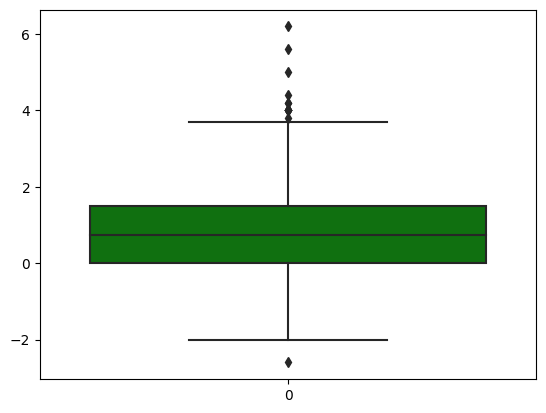

In [657]:
sns.boxplot(df['oldpeak'],color='green')

### chol

<Axes: >

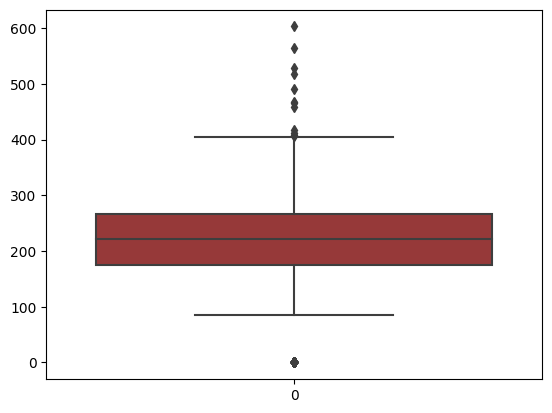

In [658]:
sns.boxplot(df['chol'],color='brown')

### ca

<Axes: >

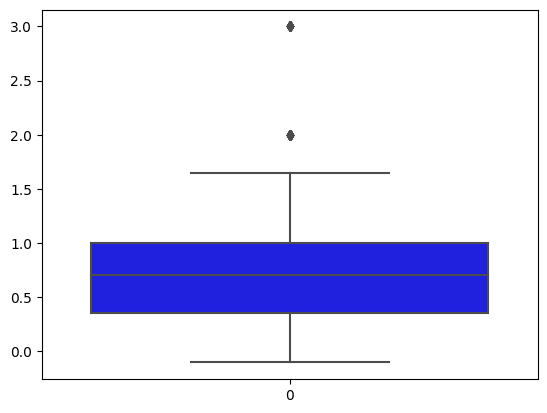

In [659]:
sns.boxplot(df['ca'],color='blue')

### num

<Axes: >

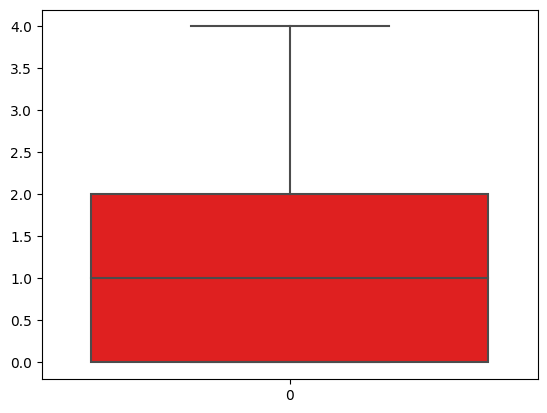

In [660]:
sns.boxplot(df['num'],color='red')

These boxplots show outliers/extreme values. Now we have to find out whether these are actually outliers that will ruin our dataset or these are extreme values that will help us in generating new hypotheses. To detect outliers, you must be domain-specific. In this case, the healthcare specialist or medical student can definitely figure out these are outliers or not.

* In trestbps column, minimum outlier value is 0, let's identify where the value of trestbps in dataset is 0.

In [661]:
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.438714,reversable defect,3


* Resting Blood Pressure(Trestbps):
Normal human blood pressure ranges from 90/60 mmHg to 120/80 mmHg. A value of 0 is medically impossible, so this is clearly an outlier.
* Cholesterol (chol):
The value of chol is 0.0, which is also not realistic. Normal cholesterol levels typically range between 125 to 200 mg/dL. A value of 0 indicates missing or incorrectly recorded data. Thus, it is also an outlier.

In [662]:
#remove this row
df = df[df['trestbps'] != 0]

#check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [663]:
#trestbps maximum outlier/extreme values
df[df['trestbps']>175]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
83,84,68,Male,Cleveland,non-anginal,180.0,274.000000,True,lv hypertrophy,150.0,True,1.6,flat,0.000000,reversable defect,3
126,127,56,Female,Cleveland,asymptomatic,200.0,288.000000,True,lv hypertrophy,133.0,True,4.0,downsloping,2.000000,reversable defect,3
183,184,59,Male,Cleveland,typical angina,178.0,270.000000,False,lv hypertrophy,145.0,False,4.2,downsloping,0.000000,reversable defect,0
188,189,54,Male,Cleveland,atypical angina,192.0,283.000000,False,lv hypertrophy,195.0,False,0.0,upsloping,1.000000,reversable defect,1
201,202,64,Female,Cleveland,asymptomatic,180.0,325.000000,False,normal,154.0,True,0.0,upsloping,0.000000,normal,0
213,214,66,Female,Cleveland,asymptomatic,178.0,228.000000,True,normal,165.0,True,1.0,flat,2.000000,reversable defect,3
231,232,55,Female,Cleveland,asymptomatic,180.0,327.000000,False,st-t abnormality,117.0,True,3.4,flat,0.000000,normal,2
338,339,39,Male,Hungary,atypical angina,190.0,241.000000,False,normal,106.0,False,0.0,flat,0.922624,reversable defect,0
375,376,45,Female,Hungary,atypical angina,180.0,239.178129,False,normal,180.0,False,0.0,upsloping,0.266641,normal,0
387,388,46,Male,Hungary,asymptomatic,180.0,280.000000,False,st-t abnormality,120.0,False,0.0,flat,0.837687,normal,0


According to the statistical analysis, resting blood pressure values greater than 270 would be considered outliers. However, in a medical context, 175 is still high and could be flagged as a potential health risk, even though it's not a statistical outlier.

In [664]:
#thalch variable outliers 
print(df[df['thalch']<70])
print('---------------------')
print(df[df['thalch']>235])

      id  age   sex        dataset            cp  trestbps   chol    fbs  \
631  632   51  Male    Switzerland  asymptomatic     140.0    0.0  False   
677  678   60  Male    Switzerland  asymptomatic     135.0    0.0  False   
705  706   65  Male    Switzerland  asymptomatic     145.0    0.0  False   
800  801   58  Male  VA Long Beach  asymptomatic     132.0  458.0   True   

              restecg  thalch  exang   oldpeak        slope        ca  \
631            normal    60.0  False  0.000000         flat  1.089354   
677            normal    63.0   True  0.500000    upsloping  1.125891   
705  st-t abnormality    67.0  False  1.213611         flat  1.180527   
800            normal    69.0  False  1.000000  downsloping  1.591846   

                  thal  num  
631             normal    2  
677  reversable defect    3  
705       fixed defect    3  
800  reversable defect    0  
---------------------
Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg

* For thalch, values below 60 and above 235 can be flagged as outliers based on medical context and statistical analysis. It means there is no outlier in thalch variable.

### oldpeak

In [665]:
df[df['oldpeak']<-2.55]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
615,616,46,Male,Switzerland,asymptomatic,100.0,0.0,False,st-t abnormality,133.0,False,-2.6,flat,0.116128,reversable defect,1


In [666]:
df[df['oldpeak']>4.25]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
91,92,62,Female,Cleveland,asymptomatic,160.0,164.0,False,lv hypertrophy,145.0,False,6.2,downsloping,3.000000,reversable defect,3
123,124,55,Male,Cleveland,asymptomatic,140.0,217.0,False,normal,111.0,True,5.6,downsloping,0.000000,reversable defect,3
285,286,58,Male,Cleveland,asymptomatic,114.0,318.0,False,st-t abnormality,140.0,False,4.4,downsloping,3.000000,fixed defect,4
589,590,50,Male,Hungary,asymptomatic,140.0,231.0,False,st-t abnormality,140.0,True,5.0,flat,1.242677,reversable defect,1


* Values below -2.55 can be considered outliers for negative depression.
* Values above 4.25 can be considered outliers for positive depression.

All the oldpeak values above 4.25 are extreme values. They are outside the expected range of values based on the IQR method, and they might indicate exceptional cases, misreported data, or require further examination.

You might consider investigating these extreme values further, checking for potential data entry errors or deciding whether they should be treated as outliers (e.g., by removing or capping the values).

# **Machine Learning**

In [667]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [672]:
# Split the data into X and y
X = df.drop(columns='id', axis=1)
y = df['num']

# List of columns to encode
columns_to_encode = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Initialize label encoder and apply encoding
le_dict = {}  # Dictionary to store the label encoders
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode the column
    le_dict[col] = le  # Save the label encoder for potential inverse transformation later


#split the data into train, test and split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [673]:
# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    
}

# Train models and evaluate
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((model_name, acc))
        print(f"{model_name} Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"Error training {model_name}: {e}")

# Select the best model
if results:
    best_model_name, best_model_score = max(results, key=lambda x: x[1])
    print("\nBest Model:")
    print(f"{best_model_name} with accuracy: {best_model_score:.4f}")
else:
    print("No valid model could be trained.")


Training Random Forest...
Random Forest Accuracy: 0.9783
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       0.99      1.00      1.00       102
           2       0.93      1.00      0.96        37
           3       0.92      0.92      0.92        37
           4       1.00      0.20      0.33         5

    accuracy                           0.98       322
   macro avg       0.97      0.82      0.84       322
weighted avg       0.98      0.98      0.97       322

Training SVM...
SVM Accuracy: 0.4907
              precision    recall  f1-score   support

           0       0.51      0.96      0.66       141
           1       0.42      0.23      0.29       102
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00         5

    accuracy                           0.49       322
   macro avg       0.18      0.24    

# **Hyper Parameter Tuning**

In [674]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_



In [677]:


# Predict using the best model found after hyperparameter tuning
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# For a detailed classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix (for classification problems)
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9782608695652174
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       0.99      1.00      1.00       102
           2       0.93      1.00      0.96        37
           3       0.92      0.92      0.92        37
           4       1.00      0.20      0.33         5

    accuracy                           0.98       322
   macro avg       0.97      0.82      0.84       322
weighted avg       0.98      0.98      0.97       322

[[141   0   0   0   0]
 [  0 102   0   0   0]
 [  0   0  37   0   0]
 [  0   1   2  34   0]
 [  0   0   1   3   1]]


In [678]:
#decision tree hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_


In [681]:
# Predict using the best model found after hyperparameter tuning
y_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# For a detailed classification report
print(classification_report(y_test, y_pred))



Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00         5

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322



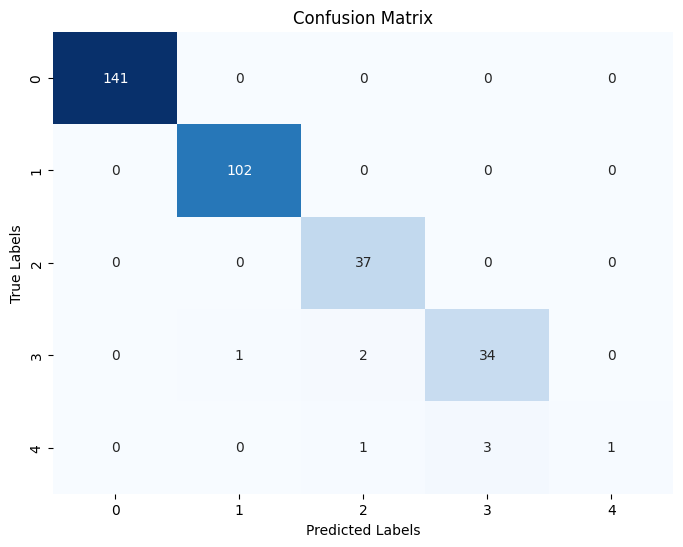

In [680]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with better formatting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4], cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
